<a href="https://colab.research.google.com/github/megha-sahuu/financial_risk_and_Performance_analysis/blob/main/financial_risk_and_Performance_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Overview**
**Objective:** Analyze the financial risk of a diversified portfolio based on historical stock data, including volatility, correlation, VaR, maximum drawdown, and stress testing.

**Tools:** Python, Pandas, NumPy, Matplotlib, Seaborn, Yahoo Finance API (for data), and any publicly available CSV dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# **Data Preparation**

In [ ]:
tickers = ['AAPL', 'GOOG', 'MSFT', 'NFLX', 'AMZN', 'TSLA']
start_date = '2023-01-01'
end_date = '2023-12-31'
data = {ticker: yf.download(ticker, start=start_date, end=end_date) for ticker in tickers}

df = pd.concat({ticker: data[ticker]['Close'] for ticker in tickers}, axis=1)
df.columns = tickers

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



# **Descriptive Statistics**

In [ ]:
stats = df.describe().T
print(stats)


      count        mean        std         min         25%         50%  \
AAPL  250.0  172.549000  17.331672  125.019997  162.112499  175.475006   
GOOG  250.0  119.611860  16.373269   86.769997  105.142502  123.965000   
MSFT  250.0  313.951001  40.975858  222.309998  282.994987  324.650009   
NFLX  250.0  390.247880  54.870053  292.760010  338.720001  395.715012   
AMZN  250.0  121.372800  18.900946   83.120003  102.254999  126.830002   
TSLA  250.0  217.475240  41.916800  108.099998  186.122494  222.144997   

             75%         max  
AAPL  187.330002  198.110001  
GOOG  133.290001  142.820007  
MSFT  337.897499  382.700012  
NFLX  435.047493  495.019989  
AMZN  135.360001  154.070007  
TSLA  253.019993  293.339996  


# **Time Series Analysis**

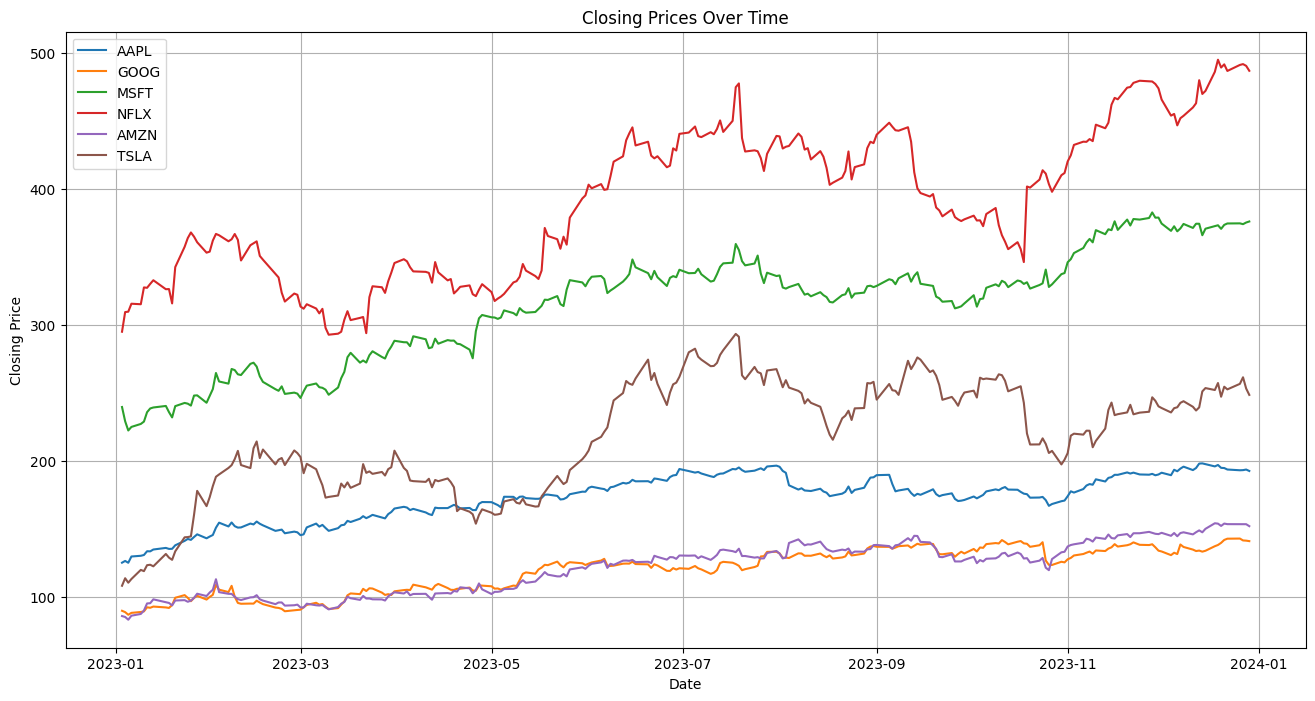

In [ ]:
plt.figure(figsize=(16, 8))
for ticker in tickers:
    plt.plot(df.index, df[ticker], label=ticker)
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


# **Moving Average Analysis**

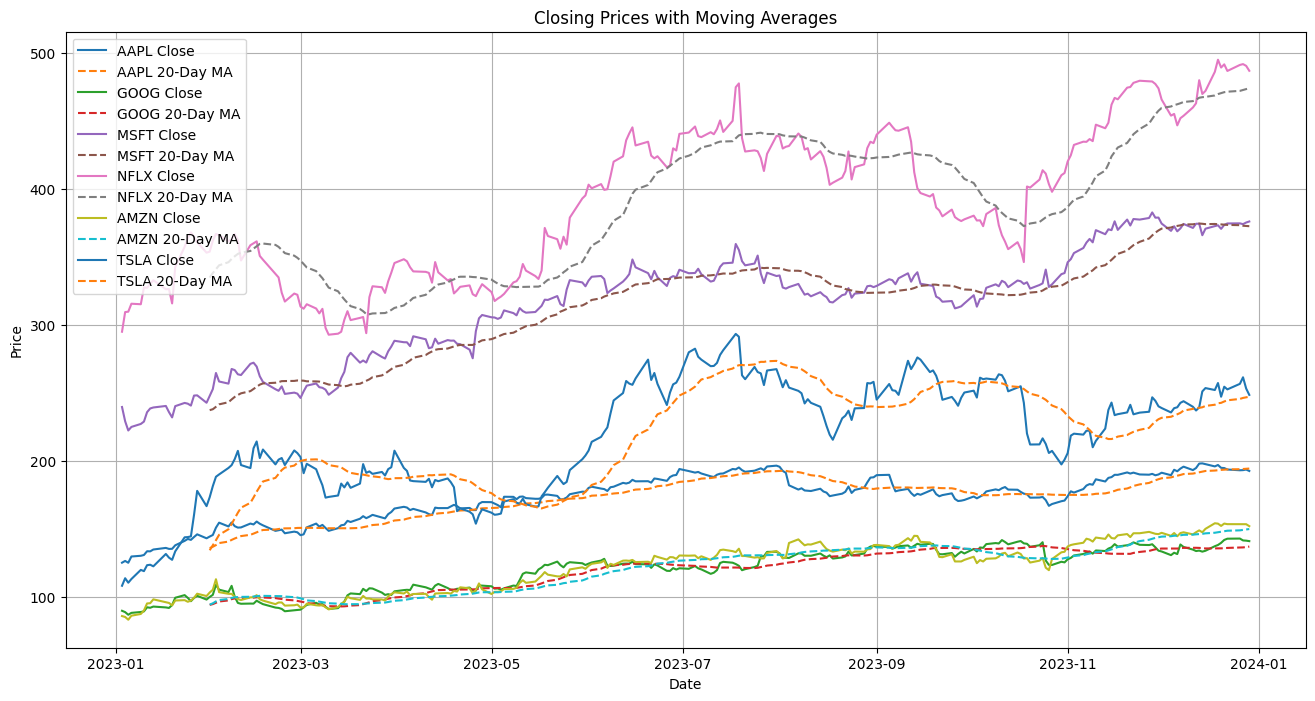

In [ ]:
window_size = 20
moving_averages = df.rolling(window=window_size).mean()

plt.figure(figsize=(16, 8))
for ticker in tickers:
    plt.plot(df.index, df[ticker], label=f'{ticker} Close')
    plt.plot(df.index, moving_averages[ticker], label=f'{ticker} {window_size}-Day MA', linestyle='--')
plt.title('Closing Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


# **Volatility Analysis**

<ipython-input-33-34e329283603>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=volatility.index, y=volatility.values, palette='viridis')


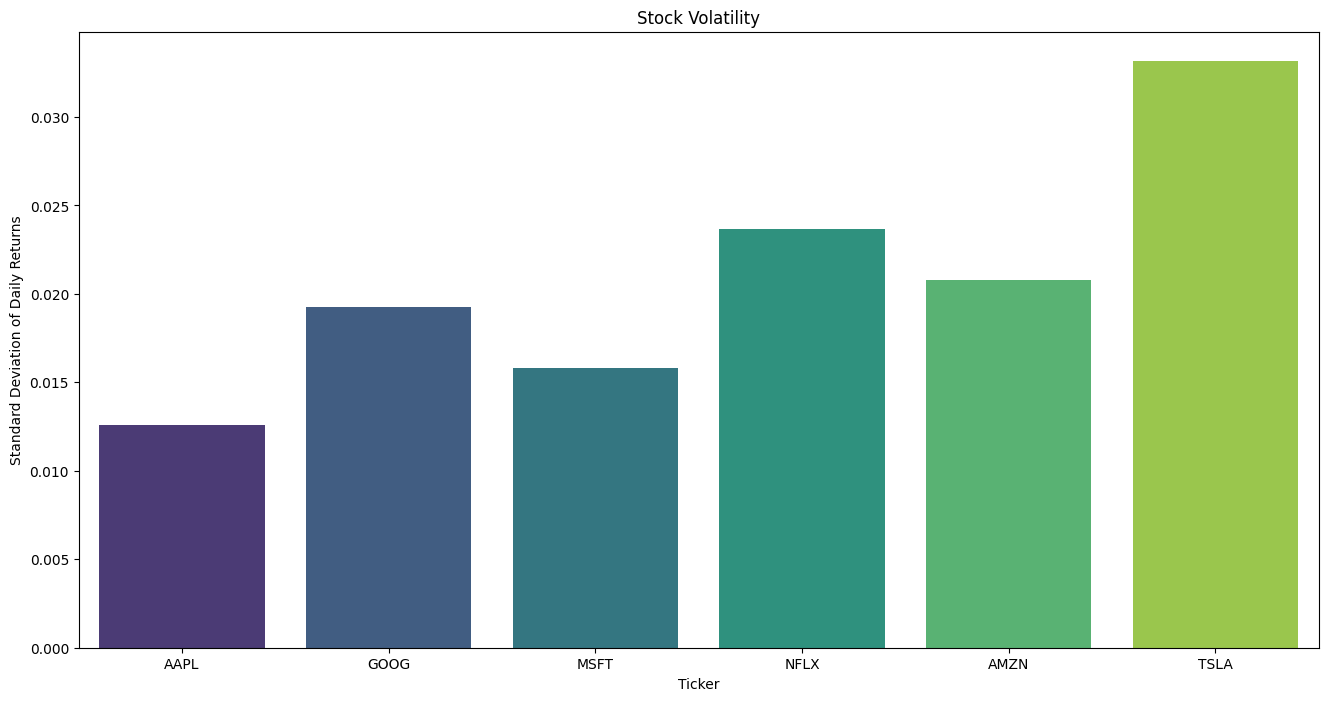

In [ ]:
daily_returns = df.pct_change().dropna()
volatility = daily_returns.std()

plt.figure(figsize=(16, 8))
sns.barplot(x=volatility.index, y=volatility.values, palette='viridis')
plt.title('Stock Volatility')
plt.xlabel('Ticker')
plt.ylabel('Standard Deviation of Daily Returns')
plt.show()


**Rolling** **Volatility**

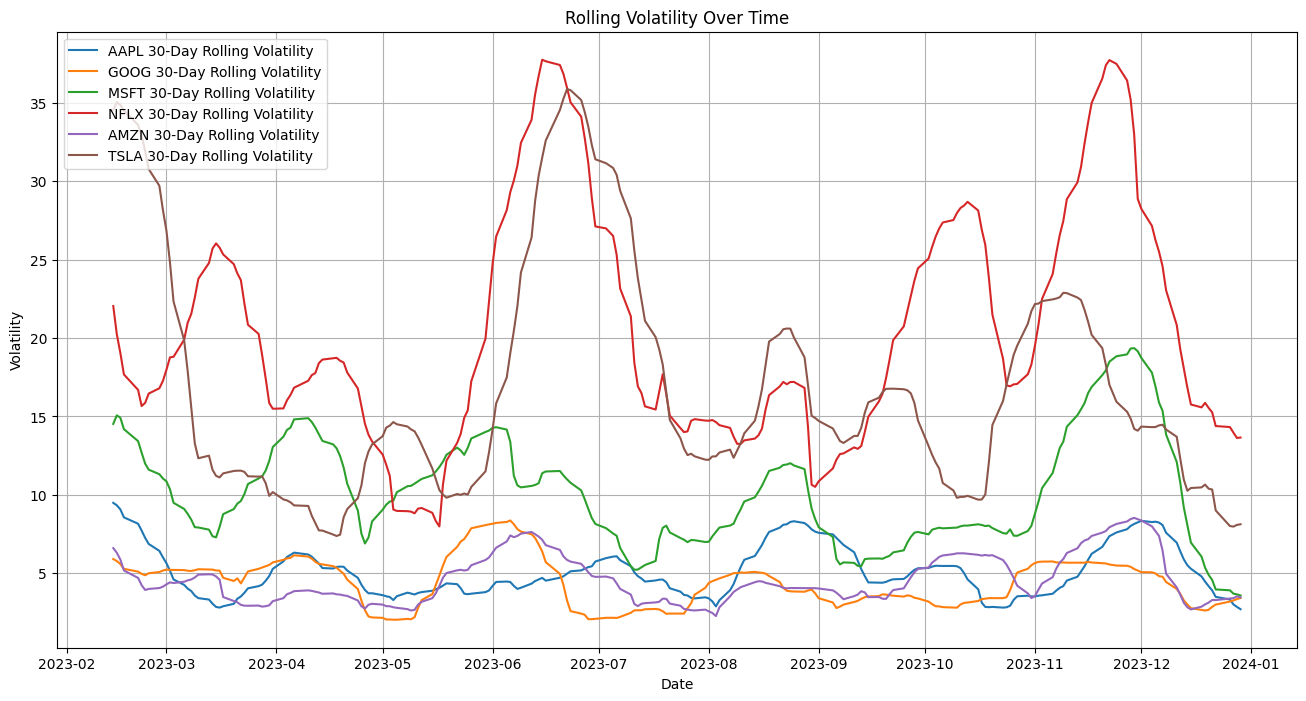

In [ ]:
rolling_volatility = df.rolling(window=30).std()

plt.figure(figsize=(16, 8))
for ticker in tickers:
    plt.plot(rolling_volatility.index, rolling_volatility[ticker], label=f'{ticker} 30-Day Rolling Volatility')
plt.title('Rolling Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()


**Correlation Analysis**

Correlation Matrix



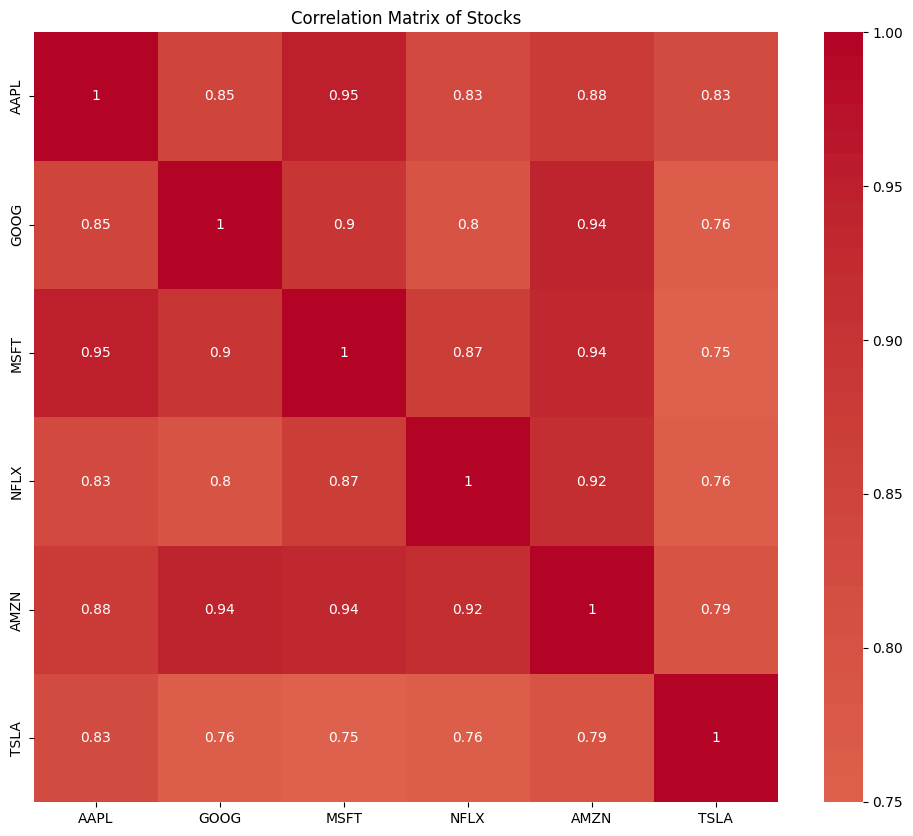

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Stocks')
plt.show()


 **Pairwise Correlation Plot**

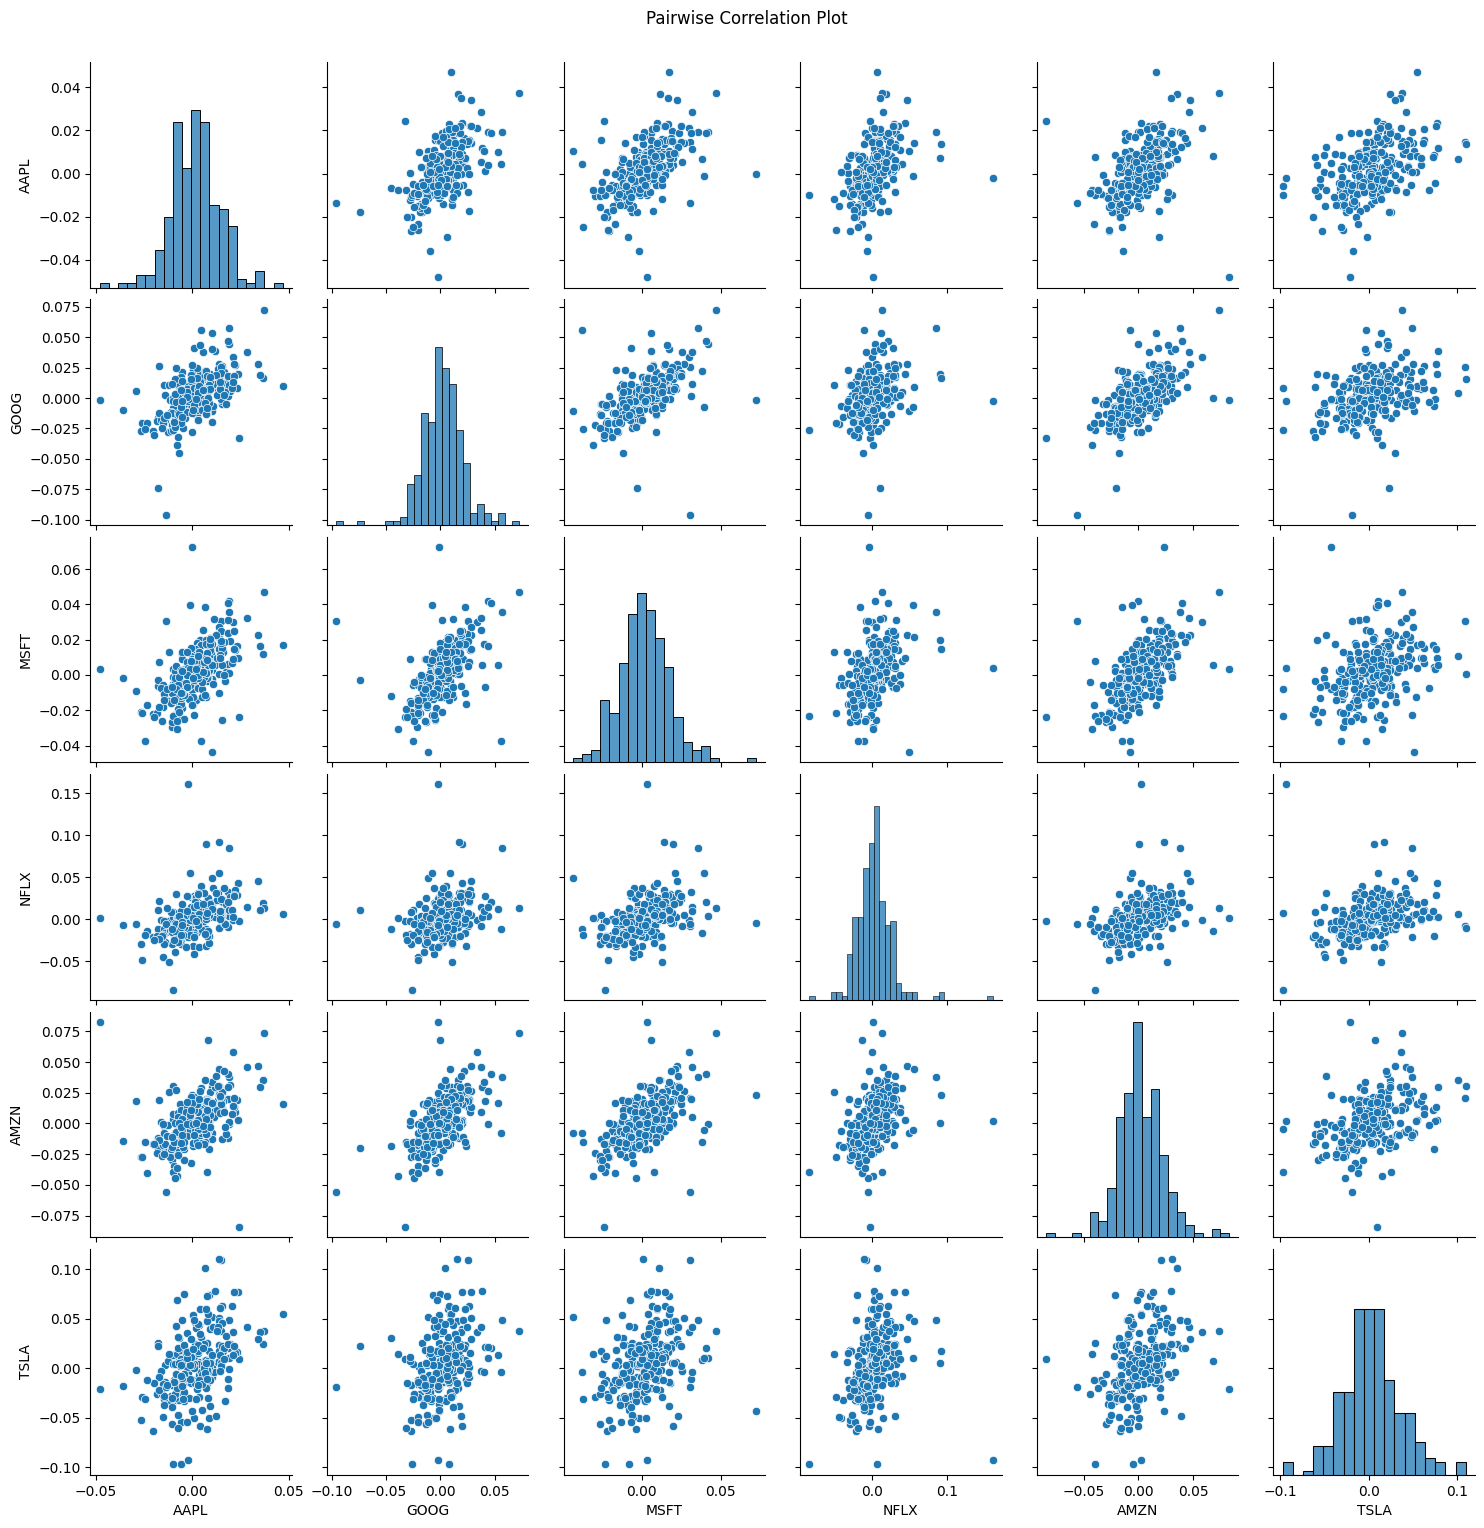

In [ ]:
sns.pairplot(daily_returns)
plt.suptitle('Pairwise Correlation Plot', y=1.02)
plt.show()


# **Performance Comparison**
**Cumulative Returns**

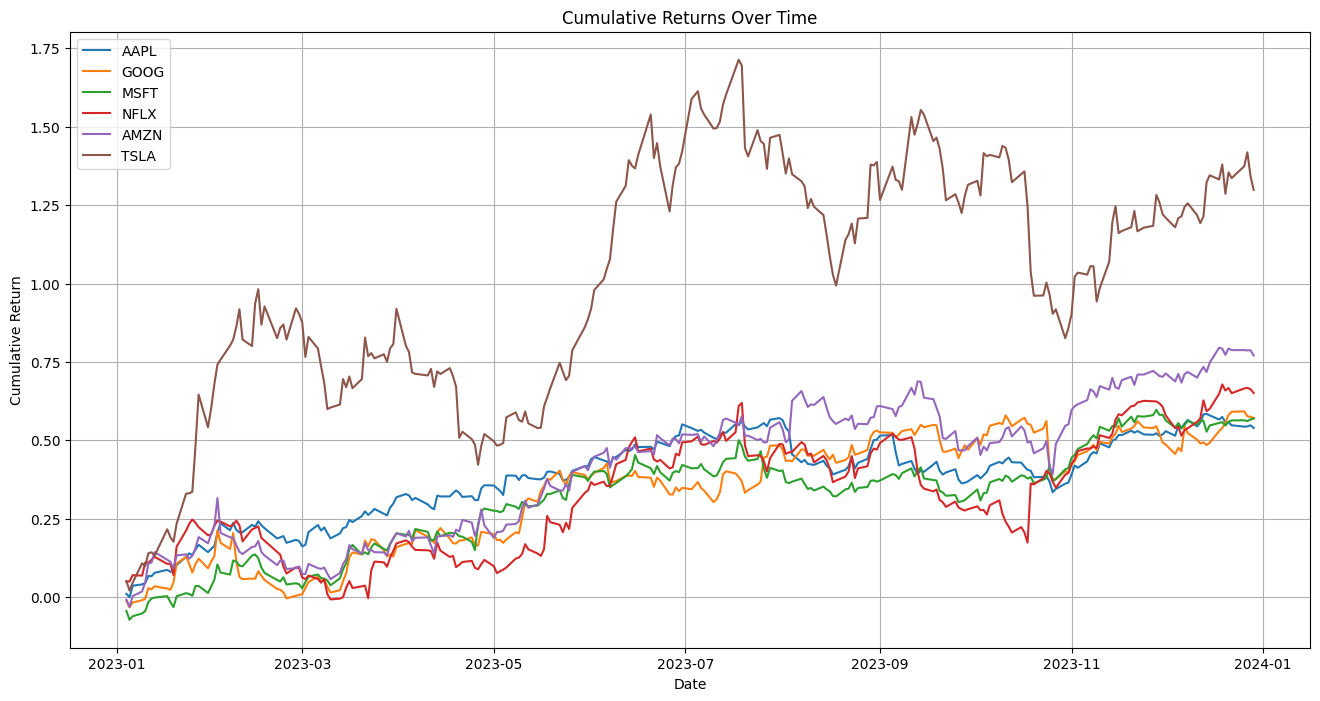

In [ ]:
cumulative_returns = (1 + daily_returns).cumprod() - 1

plt.figure(figsize=(16, 8))
for ticker in tickers:
    plt.plot(cumulative_returns.index, cumulative_returns[ticker], label=ticker)
plt.title('Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()


# **Percentage Change in Closing Prices**

<ipython-input-38-97092ca1b6c3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage_change.index, y=percentage_change.values, palette='magma')


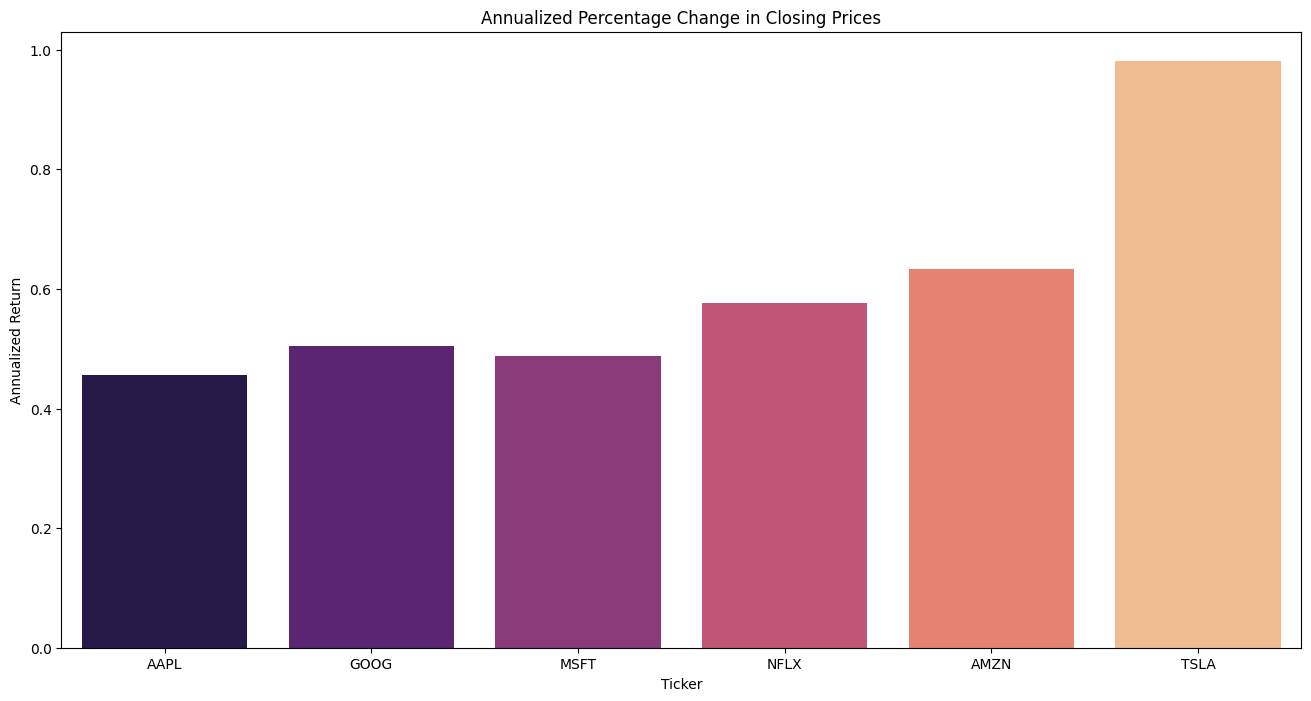

In [ ]:
percentage_change = df.pct_change().mean() * 252  # Annualize the returns

plt.figure(figsize=(16, 8))
sns.barplot(x=percentage_change.index, y=percentage_change.values, palette='magma')
plt.title('Annualized Percentage Change in Closing Prices')
plt.xlabel('Ticker')
plt.ylabel('Annualized Return')
plt.show()


# **Risk-Return Analysis**

<ipython-input-39-58fdd5d297f6>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(risk[i], avg_returns[i], ticker, fontsize=12)


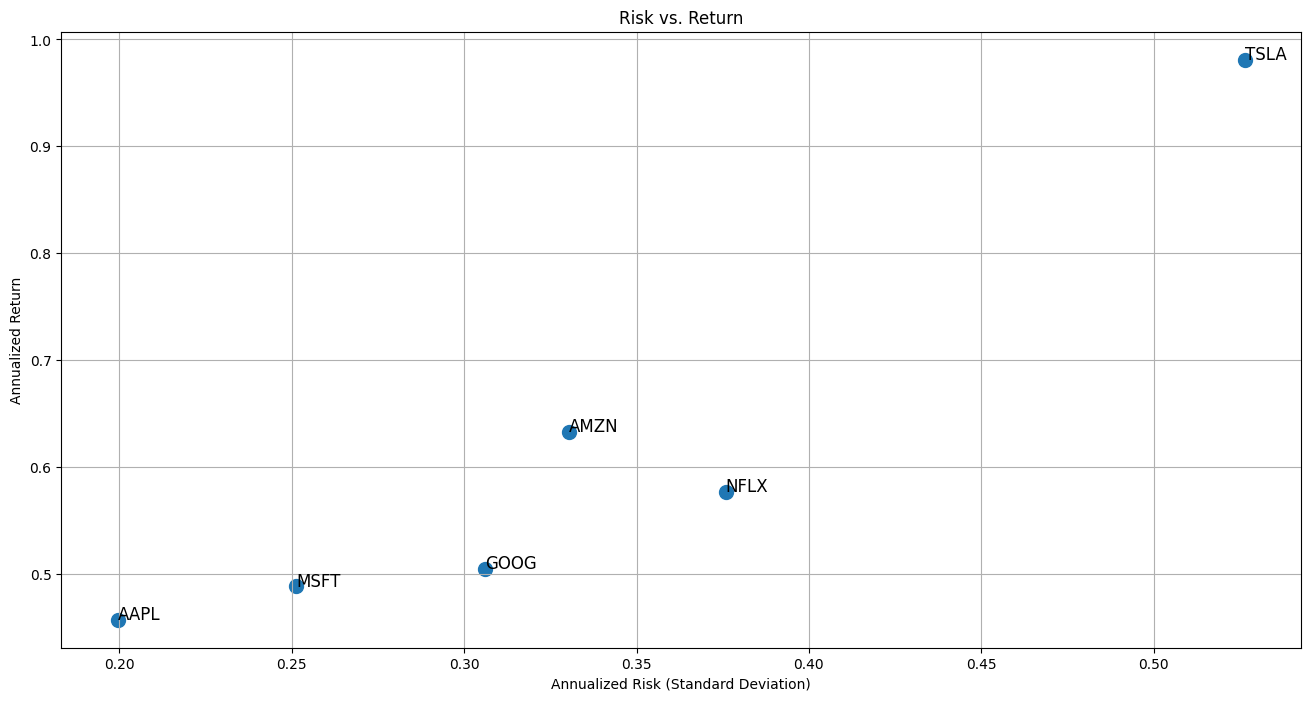

In [ ]:
avg_returns = daily_returns.mean() * 252
risk = daily_returns.std() * np.sqrt(252)

plt.figure(figsize=(16, 8))
plt.scatter(risk, avg_returns, s=100)
for i, ticker in enumerate(tickers):
    plt.text(risk[i], avg_returns[i], ticker, fontsize=12)
plt.title('Risk vs. Return')
plt.xlabel('Annualized Risk (Standard Deviation)')
plt.ylabel('Annualized Return')
plt.grid(True)
plt.show()


# **Histogram of Daily Returns**

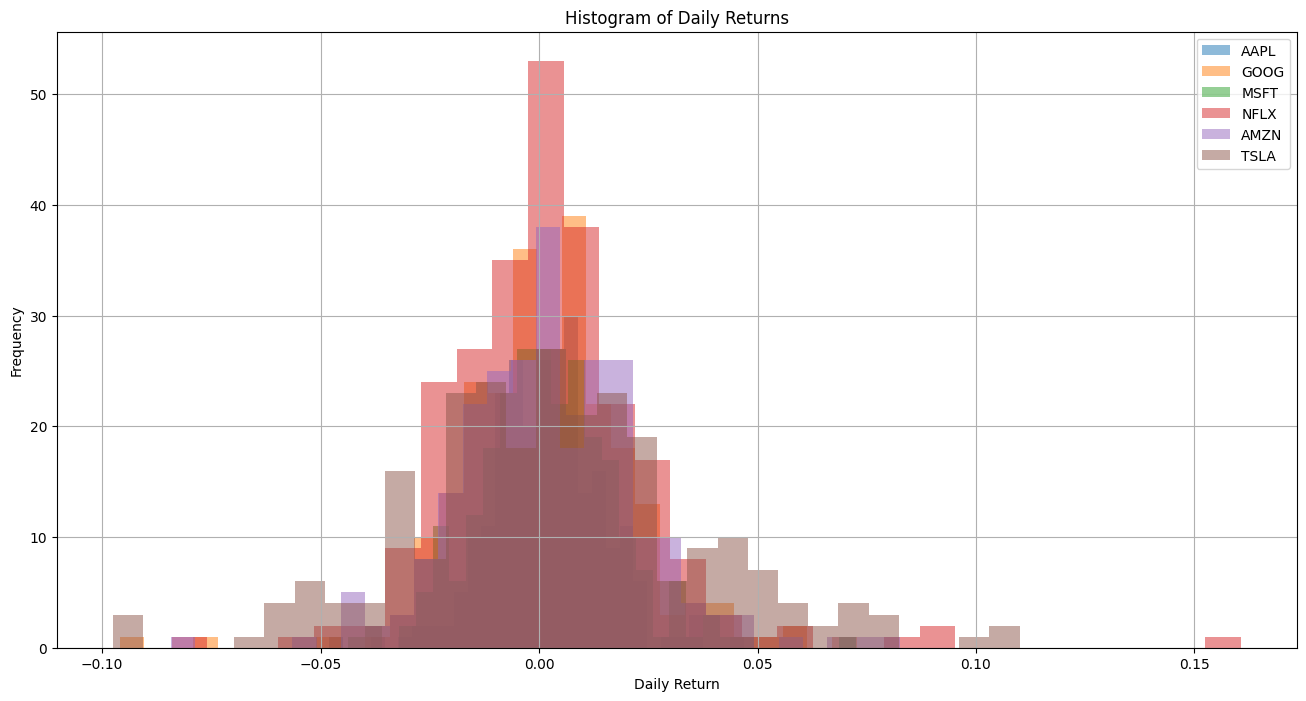

In [ ]:
plt.figure(figsize=(16, 8))
for ticker in tickers:
    plt.hist(daily_returns[ticker], bins=30, alpha=0.5, label=ticker)
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


# **Box Plot of Daily Returns**

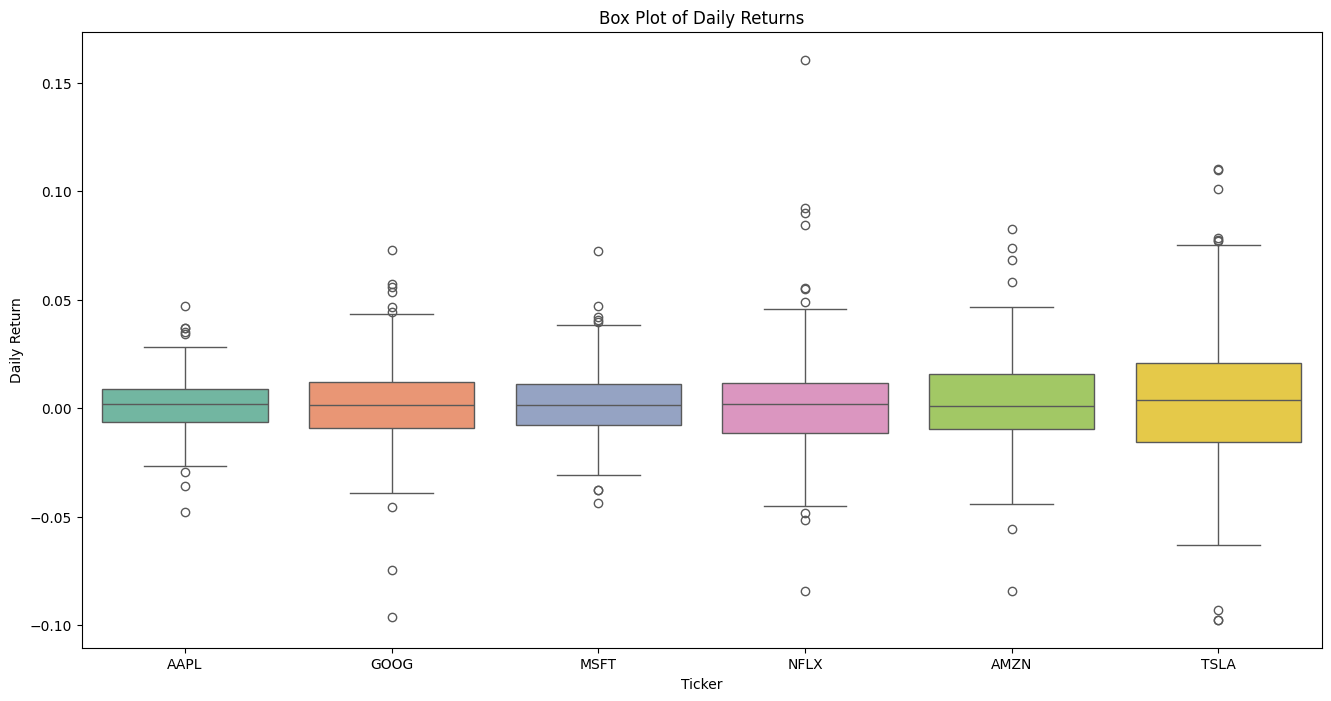

In [ ]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=daily_returns, palette='Set2')
plt.title('Box Plot of Daily Returns')
plt.xlabel('Ticker')
plt.ylabel('Daily Return')
plt.show()


# **Drawdown Analysis**

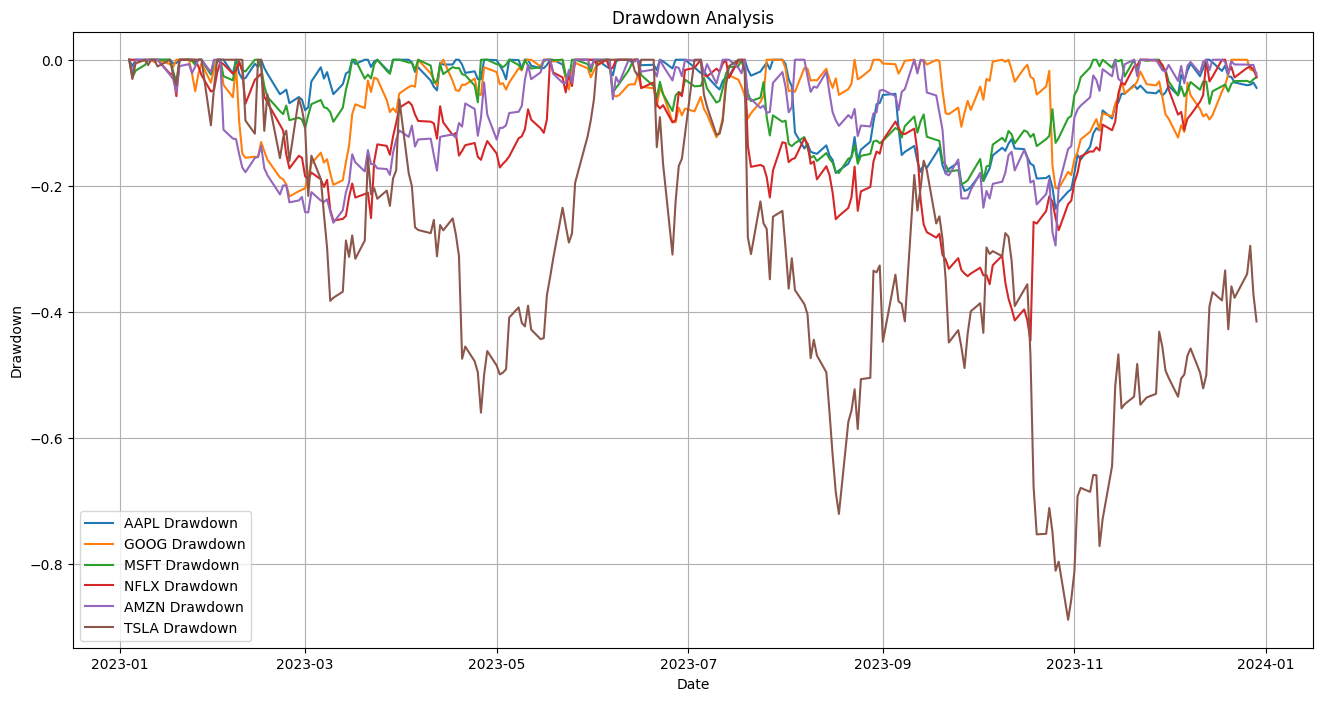

In [ ]:
cumulative_returns = (1 + daily_returns).cumprod() - 1
drawdown = cumulative_returns - cumulative_returns.cummax()

plt.figure(figsize=(16, 8))
for ticker in tickers:
    plt.plot(drawdown.index, drawdown[ticker], label=f'{ticker} Drawdown')
plt.title('Drawdown Analysis')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.show()


# **Rolling Sharpe Ratio**

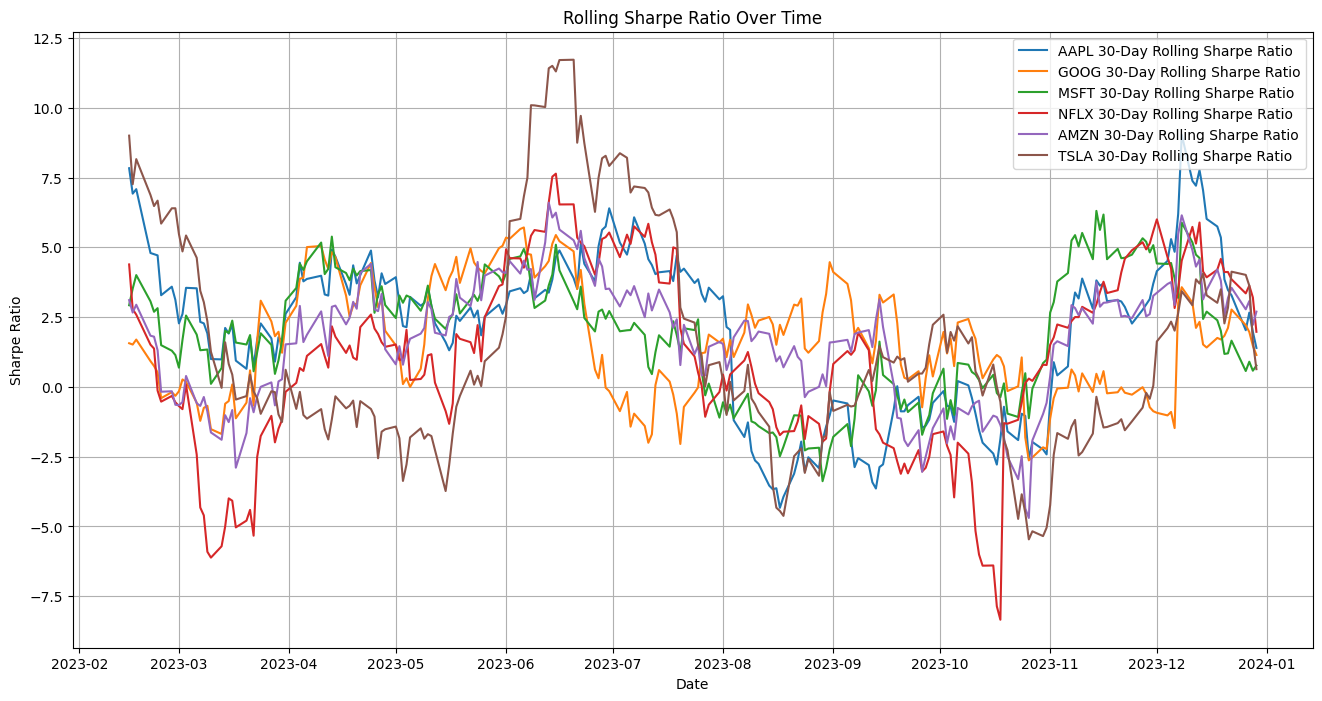

In [ ]:
risk_free_rate = 0.03  # Assume a constant risk-free rate
rolling_mean_return = daily_returns.rolling(window=30).mean() * 252
rolling_std_dev = daily_returns.rolling(window=30).std() * np.sqrt(252)
rolling_sharpe_ratio = (rolling_mean_return - risk_free_rate) / rolling_std_dev

plt.figure(figsize=(16, 8))
for ticker in tickers:
    plt.plot(rolling_sharpe_ratio.index, rolling_sharpe_ratio[ticker], label=f'{ticker} 30-Day Rolling Sharpe Ratio')
plt.title('Rolling Sharpe Ratio Over Time')
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.legend()
plt.grid(True)
plt.show()


# **Return and Volatility Heatmap**

In [ ]:
returns_volatility = pd.DataFrame({
    'Return': avg_returns,
    'Volatility': risk
})

fig = go.Figure(data=go.Heatmap(
    z=returns_volatility.values,
    x=returns_volatility.columns,
    y=returns_volatility.index,
    colorscale='Viridis'
))

fig.update_layout(
    title='Heatmap of Return and Volatility',
    xaxis_title='Metric',
    yaxis_title='Ticker'
)
fig.show()


# **Conclusion**

Here are brief conclusions for each analysis:

**Trend Analysis:**
Microsoft (MSFT) and Tesla (TSLA) show consistent upward trends, indicating strong growth potential.

**Volatility Analysis:**
Tesla (TSLA) exhibits the highest volatility, signaling higher risk compared to other stocks.

**Correlation Analysis:**
High positive correlations between some tech stocks suggest they move together, necessitating diversification for risk management.

**Risk-Return Trade-off Analysis:**
Microsoft (MSFT) provides the best balance of risk and return, making it an attractive option for conservative investors.

# **Summary**

This project focuses on a comprehensive analysis of stock market data to evaluate financial risk and volatility. By leveraging Python tools and real-time data, it provides insights into stock trends, measures volatility, and assesses risk-return dynamics. The analysis includes visualizations of trends, volatility comparisons, and correlation studies, aimed at guiding investment strategies and understanding market behavior.







